### Lab 1 - Series temporales
1) Levantar los datos desde el archivo dataset/Telefonia_movil.csv.
Los mismos fueron extraídos de
http://datosabiertos.enacom.gob.ar/visualizations/29890/trafico-de
-suscriptores-de-telefonia-movil-miles-de-minutos/

2) Explorar los datos, visualizarlos

3) Implementar dos modelos (como ser Random Walk (Naïve) y
Exponential Smoothing)

4) Visualizar los resultados y evaluarlos, comparando ambas
implementaciones

In [32]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from dateutil.parser import parse
from datetime import datetime




In [2]:
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [3]:
Datos = pd.read_csv('datasets/telefonia_movil.csv', thousands ='.')

In [4]:
Datos.dtypes

Año                                    int64
Trimestre                              int64
Minutos pospago salientes (miles)      int64
Minutos prepago salientes (miles)      int64
Total de minutos salientes (miles)     int64
Periodo                               object
dtype: object

In [5]:
Datos.head()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
0,2013,1,8785943,6582117,15368060,Ene-Mar 2013
1,2013,2,9512689,7108640,16621329,Abr-Jun 2013
2,2013,3,10315484,7335154,17650638,Jul-Sept 2013
3,2013,4,9809515,6250549,16060064,Oct-Dic 2013
4,2014,1,10128751,5799223,15927974,Ene-Mar 2013


In [6]:
def convertir_trimestre (año, trim):
    #print(type(año))
    #print(type(trim))
    #print(trim, len(str(trim*3)))
    if len(str(trim*3)) == 2: 
        mes = str(trim*3) 
    else: 
        mes = '0'+str(trim*3);
    return str(año) + '-' + mes + '-01'



In [7]:
# esta anda
#Datos['Period_tri'] = Datos.Año.astype(str).str.cat(Datos.Trimestre.astype(str), sep='Q')


#esta es la neuva
Datos['Period_tri'] = Datos.apply(lambda x: convertir_trimestre(x['Año'], x['Trimestre']), axis=1)
Datos.head()


,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo,Period_tri
0,2013,1,8785943,6582117,15368060,Ene-Mar 2013,2013-03-01
1,2013,2,9512689,7108640,16621329,Abr-Jun 2013,2013-06-01
2,2013,3,10315484,7335154,17650638,Jul-Sept 2013,2013-09-01
3,2013,4,9809515,6250549,16060064,Oct-Dic 2013,2013-12-01
4,2014,1,10128751,5799223,15927974,Ene-Mar 2013,2014-03-01


In [8]:

Datos.index = pd.to_datetime(Datos['Period_tri'])
Datos.index.names = ['Trimestre_F']
Datos.index = Datos.index.to_period()

In [9]:
#Datos['Period_tri'] = Datos['Period_tri'].to_timestamp #['Minutos pospago salientes (miles)'].plot(color='red',figsize=(6,4));
Datos.head()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo,Period_tri
Trimestre_F,,,,,,,
2013Q1,2013,1,8785943,6582117,15368060,Ene-Mar 2013,2013-03-01
2013Q2,2013,2,9512689,7108640,16621329,Abr-Jun 2013,2013-06-01
2013Q3,2013,3,10315484,7335154,17650638,Jul-Sept 2013,2013-09-01
2013Q4,2013,4,9809515,6250549,16060064,Oct-Dic 2013,2013-12-01
2014Q1,2014,1,10128751,5799223,15927974,Ene-Mar 2013,2014-03-01


In [10]:
Datos.index

PeriodIndex(['2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2',
             '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4',
             '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4',
             '2019Q1'],
            dtype='period[Q-DEC]', name='Trimestre_F', freq='Q-DEC')

In [11]:
Datos=Datos.drop(columns=['Año', 'Trimestre', 'Period_tri', 'Periodo'])
Datos.tail()

,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
Trimestre_F,,,
2018Q1,13423580,5850985,19274565
2018Q2,14240217,6027374,20267591
2018Q3,14574305,6108477,20682782
2018Q4,14915060,6613685,21528745
2019Q1,13937271,6427084,20364355


### Exploración y visualización de datos

In [12]:
Datos.describe().round(2) #mas de 2 decimales me muestra los datoso como notación científica por el tamaño de los numeros

,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
count,25.00,25.0,25.00
mean,12359295.44,6562909.4,18922204.72
std,2085582.33,516860.4,1982378.31
min,8785943.00,5380710.0,15368060.00
25%,10821463.00,6250549.0,17650638.00
50%,11905073.00,6579819.0,19001229.00
75%,14240217.00,7077838.0,20364355.00
max,15960765.00,7335154.0,22899656.00


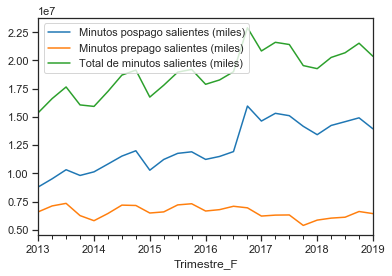

In [13]:
Datos.plot()

In [14]:
#Datos.index=Datos.index.to_period(freq='Q')
type(Datos.index)

pandas.core.indexes.period.PeriodIndex

### Implementación de modelos

#### Naïve

Tomo el dato de minutos totales para pronosticar

In [15]:
y=Datos['Total de minutos salientes (miles)']

In [22]:

h = 4
test=pd.period_range(start=Datos.index[-1]+1, periods=h, freq='Q')
test

pred_min_total=pd.Series(np.repeat(Datos.iloc[-1, 2], h), index=test)# the forecast repeats the last observed values h times

Datos_naive = Datos


print('Prediccion Naive de minutos totales para los %d períodos siguientes:' % h , end='\n')
print(pred_min_total, end='\n\n')

#pred_min_total


Prediccion Naive de minutos totales para los 4 períodos siguientes:
2019Q2    20364355
2019Q3    20364355
2019Q4    20364355
2020Q1    20364355
Freq: Q-DEC, dtype: int64



In [45]:
type(Datos_naive)

pandas.core.frame.DataFrame

In [24]:
resid=y-y.shift(1) # the shift lags the series by one period
sigma = resid.std()
round(sigma,3)

print('\
Desvío total:\t{}\n\
'.format(round(sigma,3)))

Desvío total:	1409600.295



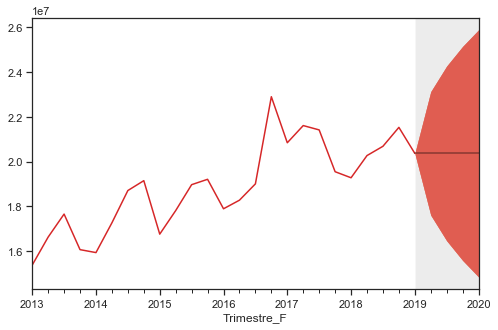

In [31]:
np.arange(1,h+1)
intv = pd.concat([pred_min_total-stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1)), pred_min_total + stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1))], axis=1)
intv.round(3)

from plotting import fanchart

point_pred = (intv[0]+intv[1])/2

fig, ax = fanchart(y['1980':],point_pred,intv,intv,intv)

plt.show()

#### Simple exponential smoothing

In [33]:
model_ses = sm.tsa.SimpleExpSmoothing(y.astype(np.float)).fit()
fitted_ses = model_ses.fittedvalues
model_ses.summary()

Dep. Variable:,endog,No. Observations:,25
Model:,SimpleExpSmoothing,SSE,43907864549324.172
Optimized:,True,AIC,708.856
Trend:,None,BIC,711.294
Seasonal:,None,AICC,710.856
Seasonal Periods:,None,Date:,"Mon, 14 Oct 2019"
Box-Cox:,False,Time:,10:53:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6030715,alpha,True
initial_level,1.5372e+07,l.0,True


In [34]:
mse_ses = sm.tools.eval_measures.mse(y,fitted_ses)
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_ses))

 In-sample fit:
 MSE               1756314581972.967


In [35]:
N = len(y)
loglik_ses=-(N/2)*(1+np.log(2*np.pi))-(N/2)*np.log(mse_ses)
aic_ses=-2*loglik_ses+2*3
bic_ses=-2*loglik_ses+np.log(N)*3
print(' Log-likelihood    %.3f' % (loglik_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))

 Log-likelihood    -387.901
 AIC               781.803
 BIC               785.460


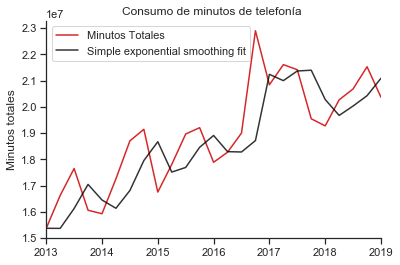

In [36]:
fig, ax= plt.subplots();#figsize=(9,6))
y.plot(color=red, label='Minutos Totales')
fitted_ses.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('Minutos totales')
ax.set_title('Consumo de minutos de telefonía ')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

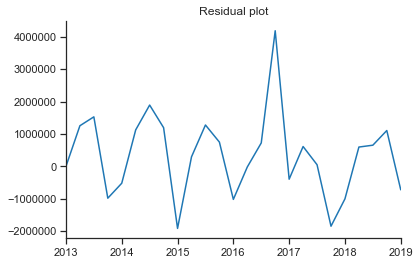

In [41]:
resid=y-fitted_ses # model_ses.resid isn't a panda.Series, so no index, no plot
fig, ax= plt.subplots();#figsize=(9,6))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

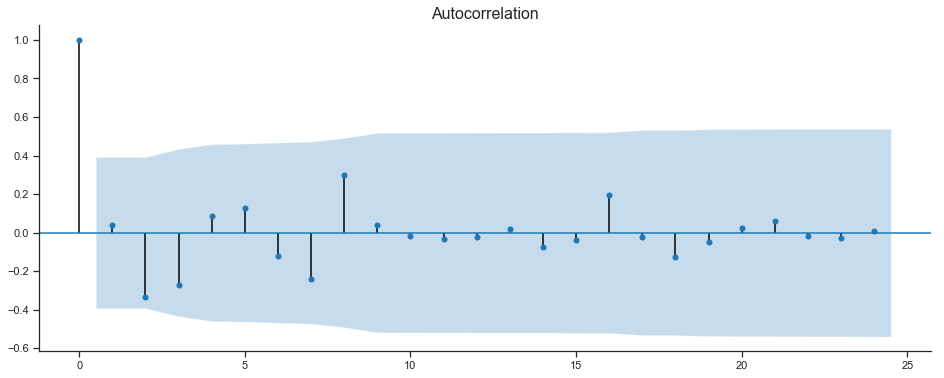

In [42]:
fig, ax = plt.subplots(figsize = (16, 6))
sm.graphics.tsa.plot_acf(resid, lags = 24, ax = ax)
ax.set_title('Autocorrelation', fontsize = 16)
sns.despine()
plt.show()

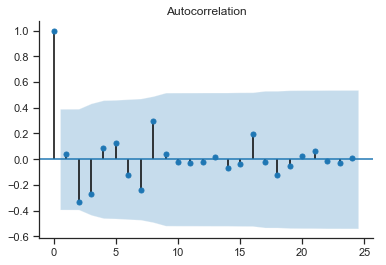

In [45]:
fig, ax = plt.subplots();#figsize=(9,6))
sm.graphics.tsa.plot_acf(resid, lags=24, ax=ax)
sns.despine()
plt.show()

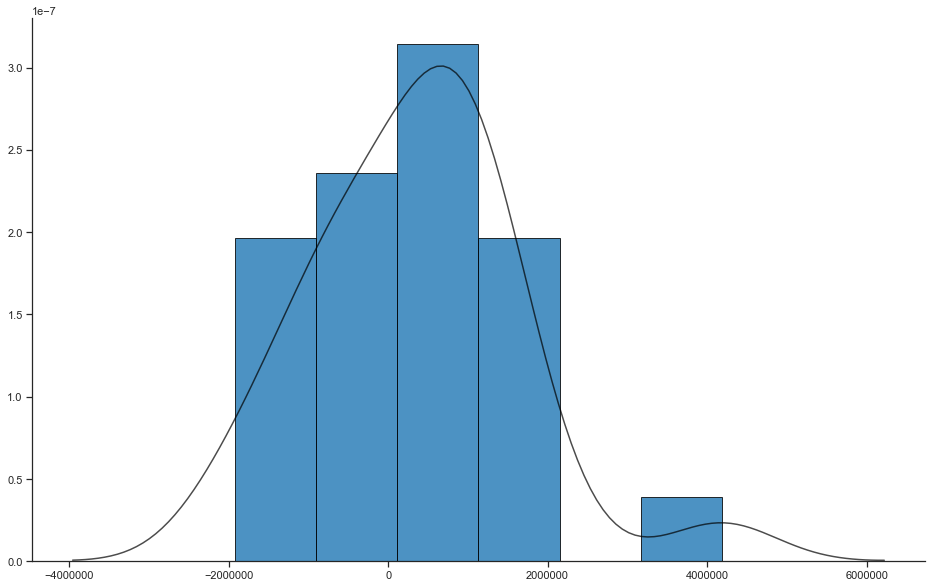

In [49]:
def hist(series):
    fig, ax= plt.subplots(figsize=(16,10))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

hist(resid)
plt.show()

### Validación del modelo

In [51]:
(y.index.get_loc('2014Q1')-1)/len(y)

0.12

In [55]:
validation = y['2014Q1':].index # the validation period is Q1 2014 onwards
start = y.index.get_loc('2014Q1') # numerical index corresponding to Q1 2015

pred1 = []
pred2 = []
actual= []
for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(y.astype(float).iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1, pred2, actual]).T
results_sm = pd.DataFrame(results_sm, columns = columns, index = validation)
results_sm.tail()

C:\Users\piaggica\AppData\Local\Continuum\anaconda3\envs\diplodatos\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\piaggica\AppData\Local\Continuum\anaconda3\envs\diplodatos\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,RW,SES,Actual
Trimestre_F,,,
2018Q1,19545262.0,2.038565e+07,19274565.0
2018Q2,19274565.0,1.959786e+07,20267591.0
2018Q3,20267591.0,2.003154e+07,20682782.0
2018Q4,20682782.0,2.040362e+07,21528745.0
2019Q1,21528745.0,2.114091e+07,20364355.0


In [56]:
from scipy import stats
table = pd.DataFrame(0.0, index = results_sm.columns[:-1], columns = ['RMSE', 'SE'])
for i in range(2):
    table.iloc[i, 0] = sm.tools.eval_measures.rmse(results_sm.iloc[:, i], results_sm.iloc[:, -1])
    table.iloc[i, 1] = (results_sm.iloc[:, i] - results_sm.iloc[:, -1]).sem()
    
table.round(3)

,RMSE,SE
RW,1407131.775,311288.345
SES,1531329.316,336063.476


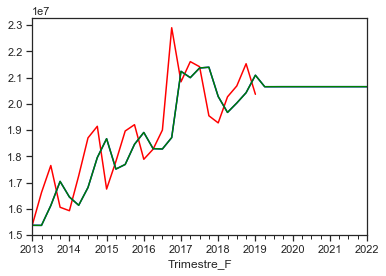

In [57]:
h=12
w=h*10
data = y
model = sm.tsa.SimpleExpSmoothing
pred_index = y.index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_exp = None
orig_roll = None
for i in range(0,h):
    current_exp = pd.concat([data, pred_expanding.head(i)]).astype(float)
    expanding = model(current_exp).fit()
    pred_expanding.update(expanding.forecast(1))
    current_roll = pd.concat([data, pred_rolling.head(i)]).astype(float)
    rolling = model(current_roll.tail(w)).fit()
    pred_rolling.update(rolling.forecast(1))
    if i==0:
        orig_fit = expanding.fittedvalues
        orig_roll = rolling.fittedvalues
ax = data[-w:].plot(color='red');#figsize=(9,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_roll[-w:],pred_rolling]).plot(ax=ax,color='green');